## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

In [8]:
(app_train['AMT_INCOME_TOTAL']>0).sum()

307511

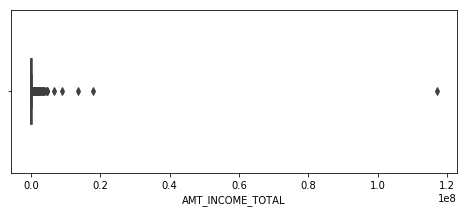

In [4]:
plt.figure(figsize=(8, 3))
sns.boxplot(app_train['AMT_INCOME_TOTAL'], width=0.4,orient="h")

In [6]:
income = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()
income["INCOME_BINNED"] = pd.cut(income["AMT_INCOME_TOTAL"], 10)
income = income.sort_values(by='INCOME_BINNED')
income_grouped1  = income.groupby('INCOME_BINNED')['AMT_INCOME_TOTAL'].describe().loc[:, ['count', 'mean']]
income_grouped1

,count,mean
INCOME_BINNED,,
"(-91324.35, 11723085.0]",307508.0,1.683167e+05
"(11723085.0, 23420520.0]",2.0,1.575004e+07
"(23420520.0, 35117955.0]",0.0,NaN
"(35117955.0, 46815390.0]",0.0,NaN
"(46815390.0, 58512825.0]",0.0,NaN
"(58512825.0, 70210260.0]",0.0,NaN
"(70210260.0, 81907695.0]",0.0,NaN
"(81907695.0, 93605130.0]",0.0,NaN
"(93605130.0, 105302565.0]",0.0,NaN


In [9]:
income_grouped2  = income.groupby('INCOME_BINNED')['TARGET'].describe().loc[:, ['count', 'mean']]
income_grouped2

,count,mean
INCOME_BINNED,,
"(-91324.35, 11723085.0]",307508.0,0.080726
"(11723085.0, 23420520.0]",2.0,0.000000
"(23420520.0, 35117955.0]",0.0,NaN
"(35117955.0, 46815390.0]",0.0,NaN
"(46815390.0, 58512825.0]",0.0,NaN
"(58512825.0, 70210260.0]",0.0,NaN
"(70210260.0, 81907695.0]",0.0,NaN
"(81907695.0, 93605130.0]",0.0,NaN
"(93605130.0, 105302565.0]",0.0,NaN


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

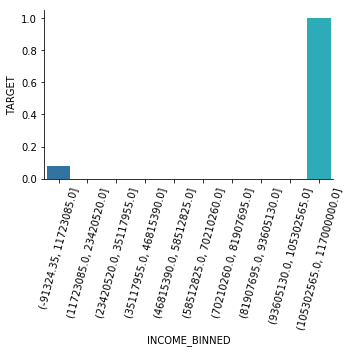

In [10]:
plt.figure(figsize = (8, 8))
sns.catplot(x='INCOME_BINNED', y='TARGET', data=income, kind='bar')
plt.xticks(rotation = 75)
plt.tight_layout()

In [11]:
income = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()
income["INCOME_BINNED"] = pd.qcut(income["AMT_INCOME_TOTAL"], q=10)
income = income.sort_values(by='INCOME_BINNED')

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

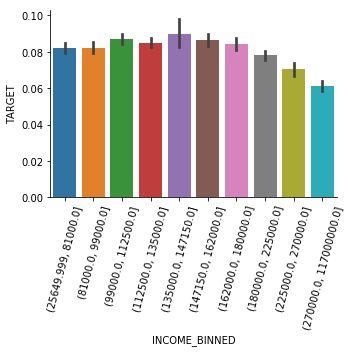

In [12]:
plt.figure(figsize = (8, 8))
sns.catplot(x='INCOME_BINNED', y='TARGET', data=income, kind='bar')
plt.xticks(rotation = 75)
plt.tight_layout()